In [28]:
#importing neccessary modules
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

# Create a quantum register with 4 qubits and a classical register with 4 bits
qr = QuantumRegister(4, 'q')
cr = ClassicalRegister(4, 'c')
qc = QuantumCircuit(qr, cr)

# Step 1: Create initial entangled pairs
# Create the first entangled pair between qubits 0 and 1
qc.h(qr[0])
qc.cx(qr[0], qr[1])

# Create the second entangled pair between qubits 2 and 3
qc.h(qr[2])
qc.cx(qr[2], qr[3])

# Step 2: Entanglement swapping - Bell state measurement on qubits 1 and 2
qc.cx(qr[1], qr[2])
qc.h(qr[1])

# Measure qubits 1 and 2
qc.measure(qr[1], cr[1])
qc.measure(qr[2], cr[2])

# Step 3: Apply conditional operations based on measurement outcomes
# If the measurement results of qubits 1 and 2 are 01 or 10, we need to apply X gate to qubit 3
qc.x(qr[3]).c_if(cr[1], 1)
qc.x(qr[3]).c_if(cr[2], 1)

# If the measurement result of qubits 1 and 2 is 11, we need to apply Z gate to qubit 3
qc.z(qr[3]).c_if(cr[1], 1)
qc.z(qr[3]).c_if(cr[2], 1)

# Measure qubits 0 and 3 to verify entanglement swapping
qc.measure(qr[0], cr[0])
qc.measure(qr[3], cr[3])

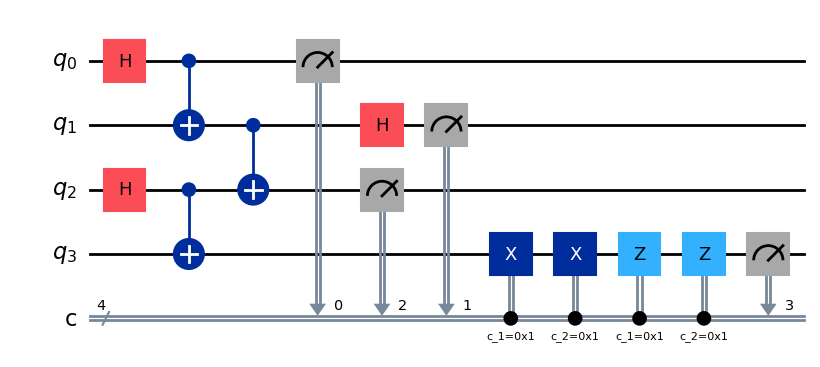

In [29]:
#draw the circuit
qc.draw(output='mpl', style= 'iqp')

{'0110': 113, '0000': 143, '0100': 121, '1101': 138, '1111': 131, '1001': 126, '0011': 118, '1010': 134}


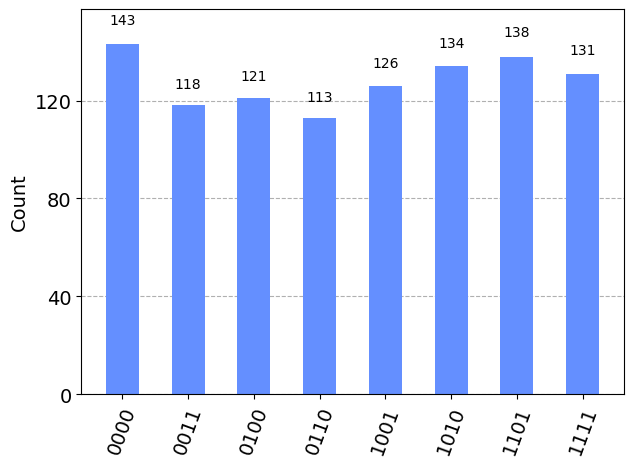

In [25]:
# Specify the backend (the simulator)
simulator = BasicSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the compiled circuit
job = simulator.run(compiled_circuit)

# Get the result
result = job.result()

# Print the counts
print(result.get_counts())

# Plot the histogram
plot_histogram(result.get_counts())

In [26]:
# Get the measurement results
counts = result.get_counts(qc)

# Verify entanglement
# Calculate the correlation between qubits 0 and 3
threshold = 0.9  # Set a threshold for verification
total_counts = sum(counts.values())
expected_states = ['00', '11']

# Calculate the frequency of expected entangled states
frequency = sum(counts.get(state, 0) for state in expected_states) / total_counts

print(f"Frequency of expected entangled states: {frequency:.2f}")

if frequency >= threshold:
    print("Entanglement verified successfully.")
else:
    print("Entanglement verification failed.")

Frequency of expected entangled states: 0.00
Entanglement verification failed.
